In [1]:
import matplotlib.pyplot as plt                                    
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Reading the datasets 

### GDP

In [2]:
GDPdata = pd.read_csv('world_GDP.csv', skiprows = 3)  
GDP_metadata=pd.read_csv('word_GDP_metadat.csv')  


### Total Population

In [3]:
polutaion_data = pd.read_csv('total_population.csv', skiprows = 3)  
population_metadata=pd.read_csv('total_population_metadata.csv')  


### Primary student

In [4]:
primary_student = pd.read_csv('primary_student.csv', skiprows = 3)  
primary_student_metadata=pd.read_csv('primary_student_metadata.csv')  


### below 14 age

In [5]:
below_14 = pd.read_csv('age14.csv', skiprows = 3)  
below_14_metadata=pd.read_csv('age14_medata.csv')  


# Data preprocessing 

### Combining data and their MetaData

In [6]:
combined_GDP = pd.merge(GDPdata,GDP_metadata ,left_on=["Country Code"], right_on = ["Country Code"])
combined_population = pd.merge(polutaion_data,population_metadata ,left_on=["Country Code"], right_on = ["Country Code"])
combined_primary_student = pd.merge(primary_student,primary_student_metadata ,left_on=["Country Code"], right_on = ["Country Code"])
combined_children = pd.merge(below_14,below_14_metadata ,left_on=["Country Code"], right_on = ["Country Code"])


In [7]:
combined_primary_student.drop(['Unnamed: 65','Unnamed: 5'], axis=1, inplace=True )
combined_GDP.drop(['Unnamed: 65','Unnamed: 5'], axis=1, inplace=True )
combined_population.drop(['Unnamed: 65','Unnamed: 5'], axis=1, inplace=True )
combined_children.drop(['Unnamed: 65','Unnamed: 5'], axis=1, inplace=True )

In [8]:
combined_data_GDP = pd.melt(combined_GDP,id_vars=["Country Name","Country Code","Indicator Name","Indicator Code",
                                   "Region","IncomeGroup","SpecialNotes","TableName"],var_name = "years",value_name="GDP Values")
combined_data_GDP.drop(['Indicator Name','Indicator Code','SpecialNotes','TableName'], axis=1, inplace=True )
combined_data_GDP

,Country Name,Country Code,Region,IncomeGroup,years,GDP Values
0,Aruba,ABW,Latin America & Caribbean,High income,1960,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,1960,1.931311e+10
2,Afghanistan,AFG,South Asia,Low income,1960,5.377778e+08
3,Africa Western and Central,AFW,NaN,NaN,1960,1.040428e+10
4,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,NaN
...,...,...,...,...,...,...
16160,Kosovo,XKX,Europe & Central Asia,Upper middle income,2020,7.716925e+09
16161,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2020,NaN
16162,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2020,3.354421e+11
16163,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2020,1.811063e+10


In [9]:
combined_data_primary = pd.melt(combined_primary_student,id_vars=["Country Name","Country Code","Indicator Name","Indicator Code",
                                   "Region","IncomeGroup","SpecialNotes","TableName"],var_name = "years",value_name="Primary Student")
combined_data_primary.drop(['Indicator Name','Indicator Code','SpecialNotes','TableName'], axis=1, inplace=True )
combined_data_primary

,Country Name,Country Code,Region,IncomeGroup,years,Primary Student
0,Aruba,ABW,Latin America & Caribbean,High income,1960,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,1960,NaN
2,Afghanistan,AFG,South Asia,Low income,1960,NaN
3,Africa Western and Central,AFW,NaN,NaN,1960,NaN
4,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,NaN
...,...,...,...,...,...,...
16160,Kosovo,XKX,Europe & Central Asia,Upper middle income,2020,NaN
16161,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2020,NaN
16162,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2020,NaN
16163,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2020,NaN


In [10]:
combined_data_population=pd.melt(combined_population,id_vars=["Country Name","Country Code","Indicator Name","Indicator Code",
                                   "Region","IncomeGroup","SpecialNotes","TableName"],var_name = "years",value_name="Total Population")
combined_data_population.drop(['Indicator Name','Indicator Code','SpecialNotes','TableName'], axis=1, inplace=True )
combined_data_population

,Country Name,Country Code,Region,IncomeGroup,years,Total Population
0,Aruba,ABW,Latin America & Caribbean,High income,1960,54208.0
1,Africa Eastern and Southern,AFE,NaN,NaN,1960,130836765.0
2,Afghanistan,AFG,South Asia,Low income,1960,8996967.0
3,Africa Western and Central,AFW,NaN,NaN,1960,96396419.0
4,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,5454938.0
...,...,...,...,...,...,...
16160,Kosovo,XKX,Europe & Central Asia,Upper middle income,2020,1775378.0
16161,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2020,29825968.0
16162,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2020,59308690.0
16163,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2020,18383956.0


In [11]:
combined_data_below_14 = pd.melt(combined_children,id_vars=["Country Name","Country Code","Indicator Name","Indicator Code",
                                   "Region","IncomeGroup","SpecialNotes","TableName"],var_name = "years",value_name="children perc.")
combined_data_below_14.drop(['Indicator Name','Indicator Code','SpecialNotes','TableName'], axis=1, inplace=True )
combined_data_below_14

,Country Name,Country Code,Region,IncomeGroup,years,children perc.
0,Aruba,ABW,Latin America & Caribbean,High income,1960,43.847190
1,Africa Eastern and Southern,AFE,NaN,NaN,1960,43.676017
2,Afghanistan,AFG,South Asia,Low income,1960,42.140851
3,Africa Western and Central,AFW,NaN,NaN,1960,41.681961
4,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,42.132067
...,...,...,...,...,...,...
16160,Kosovo,XKX,Europe & Central Asia,Upper middle income,2020,NaN
16161,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2020,38.832230
16162,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2020,28.801125
16163,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2020,44.017389


### Selecting sub_Saharan Africa

In [12]:
Sub_Sahara_GDP= combined_data_GDP[combined_data_GDP['Region']=='Sub-Saharan Africa']
Sub_Sahara_GDP

,Country Name,Country Code,Region,IncomeGroup,years,GDP Values
4,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,NaN
16,Burundi,BDI,Sub-Saharan Africa,Low income,1960,1.960000e+08
18,Benin,BEN,Sub-Saharan Africa,Lower middle income,1960,2.261956e+08
19,Burkina Faso,BFA,Sub-Saharan Africa,Low income,1960,3.304428e+08
33,Botswana,BWA,Sub-Saharan Africa,Upper middle income,1960,3.041231e+07
...,...,...,...,...,...,...
16145,Tanzania,TZA,Sub-Saharan Africa,Lower middle income,2020,6.240971e+10
16146,Uganda,UGA,Sub-Saharan Africa,Low income,2020,3.760037e+10
16162,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2020,3.354421e+11
16163,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2020,1.811063e+10


In [13]:
Sub_Sahara_Population= combined_data_population[combined_data_population['Region']=='Sub-Saharan Africa']
Sub_Sahara_Population

,Country Name,Country Code,Region,IncomeGroup,years,Total Population
4,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,5454938.0
16,Burundi,BDI,Sub-Saharan Africa,Low income,1960,2797925.0
18,Benin,BEN,Sub-Saharan Africa,Lower middle income,1960,2431617.0
19,Burkina Faso,BFA,Sub-Saharan Africa,Low income,1960,4829289.0
33,Botswana,BWA,Sub-Saharan Africa,Upper middle income,1960,502733.0
...,...,...,...,...,...,...
16145,Tanzania,TZA,Sub-Saharan Africa,Lower middle income,2020,59734213.0
16146,Uganda,UGA,Sub-Saharan Africa,Low income,2020,45741000.0
16162,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2020,59308690.0
16163,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2020,18383956.0


In [14]:
Sub_Sahara_student= combined_data_primary[combined_data_primary['Region']=='Sub-Saharan Africa']
Sub_Sahara_student

,Country Name,Country Code,Region,IncomeGroup,years,Primary Student
4,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,NaN
16,Burundi,BDI,Sub-Saharan Africa,Low income,1960,NaN
18,Benin,BEN,Sub-Saharan Africa,Lower middle income,1960,NaN
19,Burkina Faso,BFA,Sub-Saharan Africa,Low income,1960,NaN
33,Botswana,BWA,Sub-Saharan Africa,Upper middle income,1960,NaN
...,...,...,...,...,...,...
16145,Tanzania,TZA,Sub-Saharan Africa,Lower middle income,2020,10925896.0
16146,Uganda,UGA,Sub-Saharan Africa,Low income,2020,NaN
16162,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2020,NaN
16163,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2020,NaN


In [15]:
Sub_Sahara_below14=combined_data_below_14[combined_data_below_14['Region']=='Sub-Saharan Africa']
Sub_Sahara_below14

,Country Name,Country Code,Region,IncomeGroup,years,children perc.
4,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,42.132067
16,Burundi,BDI,Sub-Saharan Africa,Low income,1960,43.821008
18,Benin,BEN,Sub-Saharan Africa,Lower middle income,1960,38.532017
19,Burkina Faso,BFA,Sub-Saharan Africa,Low income,1960,41.320149
33,Botswana,BWA,Sub-Saharan Africa,Upper middle income,1960,43.643398
...,...,...,...,...,...,...
16145,Tanzania,TZA,Sub-Saharan Africa,Lower middle income,2020,43.554428
16146,Uganda,UGA,Sub-Saharan Africa,Low income,2020,46.015882
16162,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2020,28.801125
16163,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2020,44.017389


### data in 2019

In [16]:
data_2018_GDP= Sub_Sahara_GDP[Sub_Sahara_GDP['years']=='2018']
data_2018_GDP.dropna(inplace=True)

data_2018_student= Sub_Sahara_student[Sub_Sahara_student['years']=='2018']
data_2018_student.dropna(inplace=True)

data_2018_population= Sub_Sahara_Population[Sub_Sahara_Population['years']=='2018']
data_2018_population.dropna(inplace=True)

data_2018_Sub_Sahara_below14=Sub_Sahara_below14[Sub_Sahara_below14['years']=='2018']
data_2018_Sub_Sahara_below14.dropna(inplace=True)


In [22]:
data_2018_GDP['P_student']=data_2018_student['Primary Student']
data_2018_GDP['T_population']=data_2018_population['Total Population']
data_2018_GDP['children %']=data_2018_Sub_Sahara_below14['children perc.']
data_2018_GDP
data_2018_GDP['total child']= (data_2018_GDP['children %']*data_2018_population['Total Population'])/100
data_2018_GDP

,Country Name,Country Code,Region,IncomeGroup,years,GDP Values,P_student,T_population,children %,total child
15374,Angola,AGO,Sub-Saharan Africa,Lower middle income,2018,1.013532e+11,NaN,30809787.0,46.808925,1.442173e+07
15386,Burundi,BDI,Sub-Saharan Africa,Low income,2018,2.668496e+09,2170884.0,11175379.0,45.501681,5.084985e+06
15388,Benin,BEN,Sub-Saharan Africa,Lower middle income,2018,1.426241e+10,2223966.0,11485035.0,42.447682,4.875131e+06
15389,Burkina Faso,BFA,Sub-Saharan Africa,Low income,2018,1.589007e+10,3206060.0,19751466.0,44.948081,8.877905e+06
15403,Botswana,BWA,Sub-Saharan Africa,Upper middle income,2018,1.691425e+10,NaN,2254067.0,34.112946,7.689287e+05
15404,Central African Republic,CAF,Sub-Saharan Africa,Low income,2018,2.220979e+09,NaN,4666375.0,44.294321,2.066939e+06
15411,Cote d'Ivoire,CIV,Sub-Saharan Africa,Lower middle income,2018,5.801147e+10,3900222.0,25069226.0,41.936972,1.051327e+07
15412,Cameroon,CMR,Sub-Saharan Africa,Lower middle income,2018,3.997384e+10,4201988.0,25216261.0,42.631580,1.075009e+07
15413,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,Low income,2018,4.714600e+10,16807014.0,84068092.0,46.165642,3.881057e+07
15414,"Congo, Rep.",COG,Sub-Saharan Africa,Lower middle income,2018,1.367004e+10,783448.0,5244363.0,41.763502,2.190230e+06


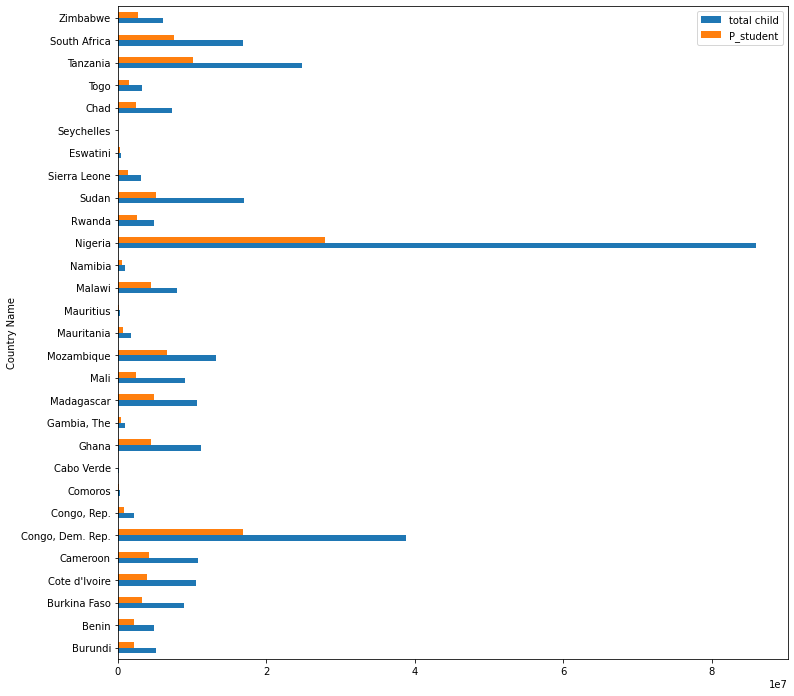

In [23]:
plt.rcParams["figure.figsize"] = (12,12)
data_2018_GDP.dropna(inplace=True)
df=data_2018_GDP[['total child','P_student']]
df.index=data_2018_GDP['Country Name']
ax = df.plot.barh()